In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import itertools as it
import math
import random
import scipy.stats as stats
import arviz as az
import seaborn as sns
from collections import Counter

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "intro_prob"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

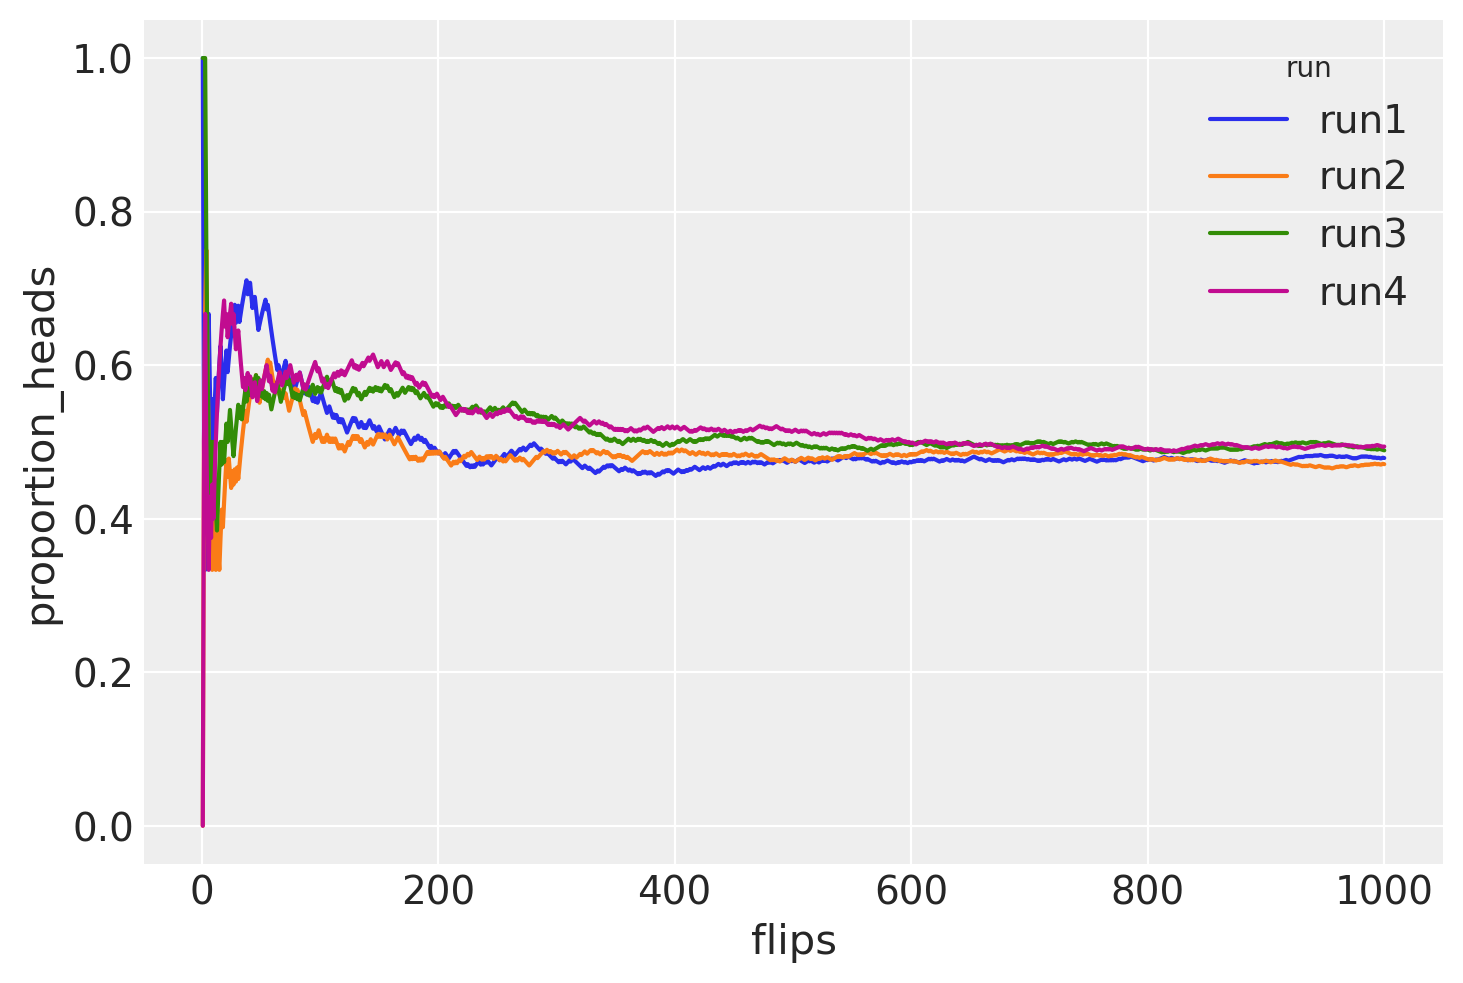

In [3]:
def coin_flips(n, run_label):
    # Genera un array di 0 e 1 dove 1 rappresenta 'testa' e 0 'croce'
    # usando una distribuzione binomiale.
    heads = np.random.binomial(1, 0.5, n)
    
    # Calcola la proporzione cumulativa di teste.
    flips = np.arange(1, n + 1) 
    proportion_heads = np.cumsum(heads) / flips
    
    # Crea un DataFrame per un facile accesso e visualizzazione dei dati.
    df = pd.DataFrame({'flips': flips, 'proportion_heads': proportion_heads, 'run': run_label})

    return df

n = 1000

df = pd.concat([coin_flips(n, f'run{i+1}') for i in range(4)], axis=0)
ax = sns.lineplot(data = df, x = 'flips', y = 'proportion_heads', hue = 'run')

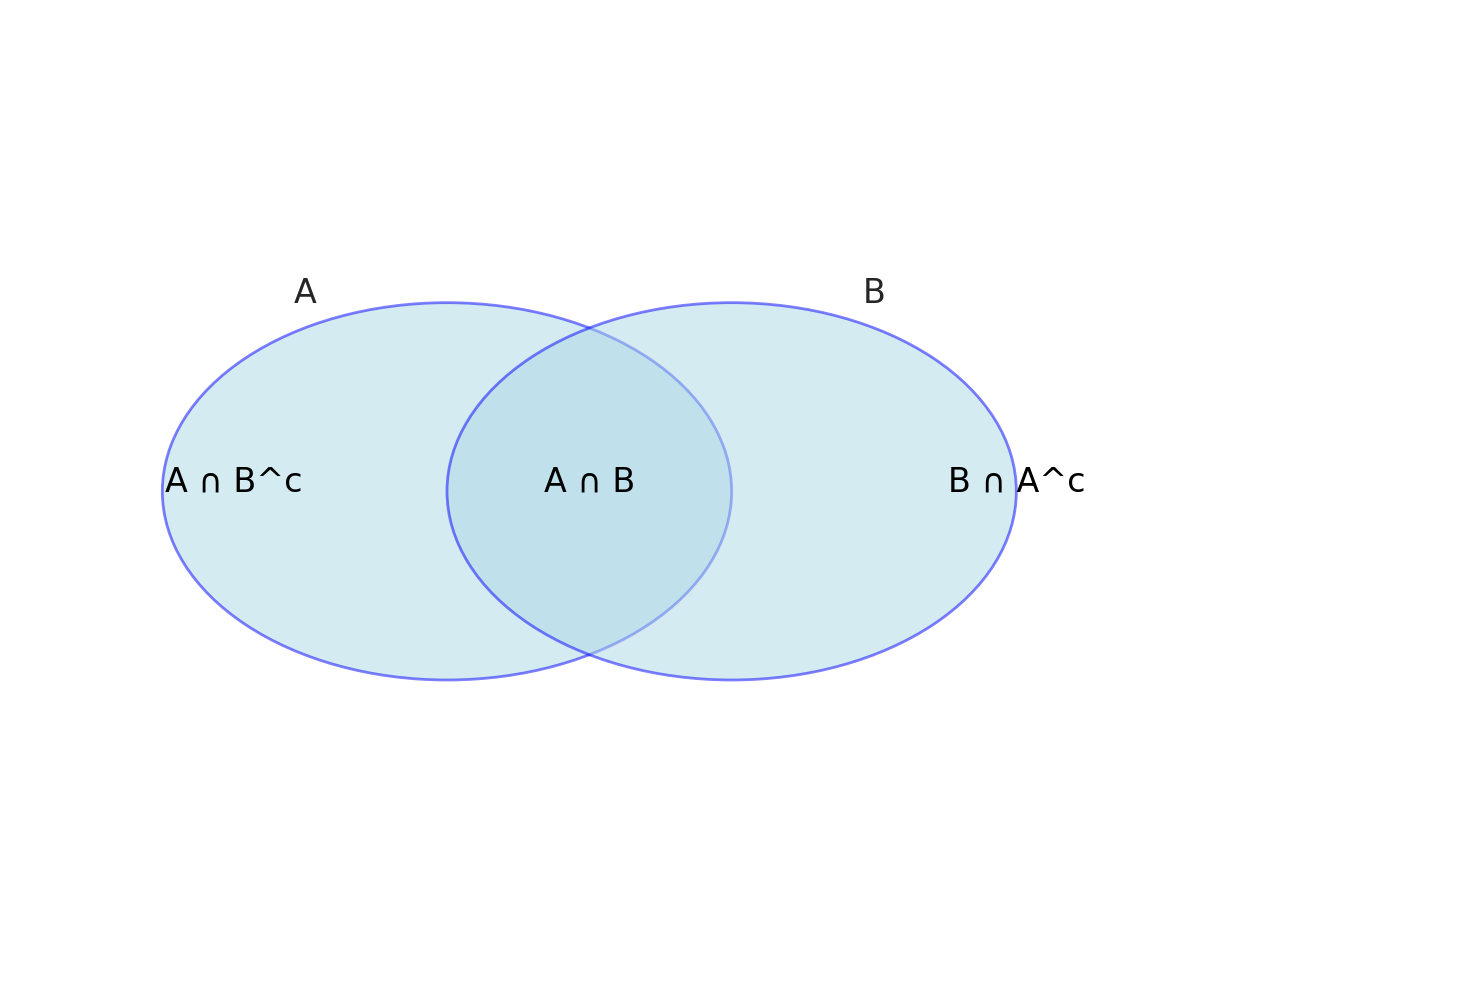

In [4]:
# Creare una nuova figura
fig, ax = plt.subplots()

# Creare cerchi per A e B
circle_A = patches.Circle((0.3, 0.5), 0.2, edgecolor='blue', facecolor='lightblue', alpha=0.5)
circle_B = patches.Circle((0.5, 0.5), 0.2, edgecolor='blue', facecolor='lightblue', alpha=0.5)

# Aggiungere cerchi alla trama
ax.add_patch(circle_A)
ax.add_patch(circle_B)

# Aggiungere etichette per A, B e le regioni
ax.text(0.2, 0.7, 'A', fontsize=12, ha='center')
ax.text(0.6, 0.7, 'B', fontsize=12, ha='center')
ax.text(0.4, 0.5, 'A ∩ B', fontsize=12, ha='center', color='black')
ax.text(0.15, 0.5, 'A ∩ B^c', fontsize=12, ha='center', color='black')
ax.text(0.7, 0.5, 'B ∩ A^c', fontsize=12, ha='center', color='black')

# Impostare i limiti dell'asse
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Rimuovere assi
ax.axis('off')

# Mostrare la trama
plt.show()

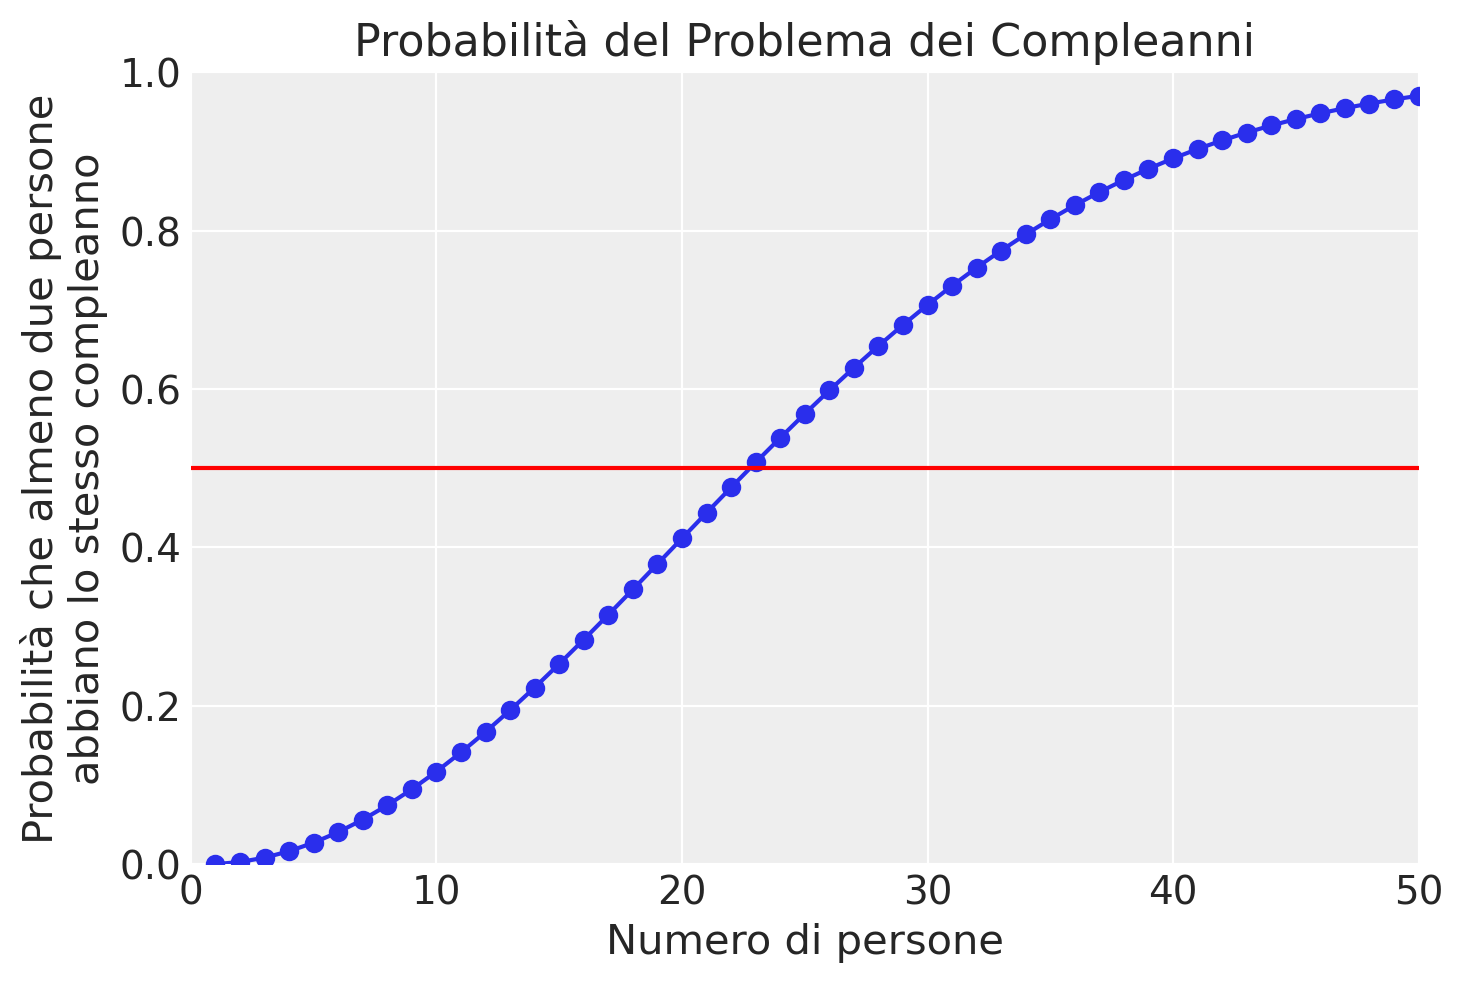

Probabilità per 20-25 persone: [0.41143838358049944, 0.44368833516523465, 0.47569530766240553, 0.507297234324024, 0.5383442579144757, 0.5686997039694264]


In [5]:
def birthday(k):
    logdenom = k * math.log(365) + math.lgamma(365 - k + 1) # log denominatore
    lognumer = math.lgamma(366) # log numeratore
    pr = 1 - np.exp(lognumer - logdenom) # trasformazione inversa
    return pr

k = np.arange(1, 51)
bday = [birthday(i) for i in k]

plt.plot(k, bday, marker='o')
plt.xlabel('Numero di persone')
plt.ylabel('Probabilità che almeno due persone\nabbiano lo stesso compleanno')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.grid(True)
plt.title('Probabilità del Problema dei Compleanni')
plt.show()

print("Probabilità per 20-25 persone:", bday[19:25])

In [6]:
k = 23  # numero di persone
sims = 1000  # numero di simulazioni
event = 0  # contatore eventi

for _ in range(sims):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event += 1

# frazione di prove in cui almeno due compleanni sono uguali
answer = event / sims
print(f"Stima della probabilità: {answer}")

# Aumentare il numero di simulazioni a un milione per maggiore accuratezza
sims_large = 1000000
event_large = 0

for _ in range(sims_large):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event_large += 1

answer_large = event_large / sims_large
print(f"Stima con un milione di simulazioni: {answer_large}")

Stima della probabilità: 0.506


Stima con un milione di simulazioni: 0.507142


In [7]:
# Funzione per calcolare le combinazioni
def nCk(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Calcolo delle probabilità per il problema della commissione
total_ways = nCk(20, 5)
no_clinical = nCk(10, 0) * nCk(10, 5)
one_clinical = nCk(10, 1) * nCk(10, 4)

p_no_clinical = no_clinical / total_ways
p_one_clinical = one_clinical / total_ways

p_at_least_two_clinical = 1 - p_no_clinical - p_one_clinical

print(f"Probabilità di almeno 2 psicologi clinici: {p_at_least_two_clinical:.3f}")

Probabilità di almeno 2 psicologi clinici: 0.848


In [8]:
# Calcolo del numero di combinazioni
total_ways_acrostic = nCk(84, 6)
acrostic_ways = 12

p_acrostic = acrostic_ways / total_ways_acrostic
print(f"Probabilità dell'acrostico: {p_acrostic:.2e}")

Probabilità dell'acrostico: 2.95e-08


In [9]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.13.2
pandas    : 2.2.2
arviz     : 0.18.0
matplotlib: 3.8.4
scipy     : 1.13.1
numpy     : 1.26.4

Watermark: 2.4.3

